# Practical case: Cyclistic

This is a notebook where the final project of the Google Data Analytics Professional Certificate will be realized. 

In this project the data worked come from Motivate International Inc. and is proposed by the own course as a practical case, that can be developed using the tools learned along the certification. For this, I implemented the **analysis using R**. 

# Case
In 2016, a company called Cyclistic begin a shared bicycles program, reaching a total of 5824 bicycles, that can be used in a network of 692 stations spread around Chicago. The way of use is taking some from one station and leave it in another. There are two possibilities, use it through a memership or as a casual user. The company would like to maximize the number of anual memberships. One idea is start from the base of casual users, that already know the service. Therefore, the goal is design a marketing strategy to convert the casual users on anual members. The data used is from february 2022 to january 2023.

# Questions for the analysis
To achieve the goal, an analysis will be realized. There are a main question asigned:
* **What's the difference between the casual and anual members users with respect to the bicycle use?**

# Fetching and reading the data
To commence, we load and import the packages that will be used.

In [1]:
install.packages("tidyverse")
library("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository http://cran.rstudio.com/src/contrib:
  cannot open URL 'http://cran.rstudio.com/src/contrib/PACKAGES'”
Warning message:
“package ‘tidyverse’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all confl

(As in the course was said, there is no problem related with the conflicts that arise with the run of the code above.)

Now, we read the data and import it as a dataframe.

In [2]:
#Dataframes imported as elements of a list
count_vec <- c("02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12")
data_list <- list()
for(i in seq_along(count_vec)){
    file_name <- paste("/kaggle/input/bicycle-dataset-202202-202301/original_data/2022",count_vec[i],"-divvy-tripdata.csv",sep="")
    data_frame_read <- read.csv(file = file_name)
    #Add as an element
    data_list[[i]] <- data_frame_read
}

data_list[[12]] <- data_frame_read #For 2023 january

#Merge of rows in a unique dataframe
data <- rbind(data_list[[1]],data_list[[2]],data_list[[3]],data_list[[4]],data_list[[5]],data_list[[6]],
             data_list[[7]],data_list[[8]],data_list[[9]],data_list[[10]],data_list[[11]],data_list[[12]])

# Cleaning data
The first thing that should be done is look at the data. For this, there are known several methods, as the next ones. 

In [3]:
head(data) #First rows of the dataframe
print("Structure:")
str(data) #Structure of the dataframe
print("Columns names:")
names(data) #Columns names

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,E1E065E7ED285C02,classic_bike,2022-02-19 18:08:41,2022-02-19 18:23:56,State St & Randolph St,TA1305000029,Clark St & Lincoln Ave,13179,41.88462,-87.62783,41.91569,-87.63460,member
2,1602DCDC5B30FFE3,classic_bike,2022-02-20 17:41:30,2022-02-20 17:45:56,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Wrightwood Ave,TA1307000113,41.92914,-87.64908,41.92877,-87.66391,member
3,BE7DD2AF4B55C4AF,classic_bike,2022-02-25 18:55:56,2022-02-25 19:09:34,State St & Randolph St,TA1305000029,Canal St & Adams St,13011,41.88462,-87.62783,41.87926,-87.63990,member
4,A1789BDF844412BE,classic_bike,2022-02-14 11:57:03,2022-02-14 12:04:00,Southport Ave & Waveland Ave,13235,Broadway & Sheridan Rd,13323,41.94815,-87.66394,41.95283,-87.64999,member
5,07DE78092C62F7B3,classic_bike,2022-02-16 05:36:06,2022-02-16 05:39:00,State St & Randolph St,TA1305000029,Franklin St & Lake St,TA1307000111,41.88462,-87.62783,41.88584,-87.63550,member
6,9A2F204F04AB7E24,classic_bike,2022-02-07 09:51:57,2022-02-07 10:07:53,St. Clair St & Erie St,13016,Franklin St & Monroe St,TA1309000007,41.89435,-87.62280,41.88032,-87.63519,member


[1] "Structure:"
'data.frame':	5745753 obs. of  13 variables:
 $ ride_id           : chr  "E1E065E7ED285C02" "1602DCDC5B30FFE3" "BE7DD2AF4B55C4AF" "A1789BDF844412BE" ...
 $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-02-19 18:08:41" "2022-02-20 17:41:30" "2022-02-25 18:55:56" "2022-02-14 11:57:03" ...
 $ ended_at          : chr  "2022-02-19 18:23:56" "2022-02-20 17:45:56" "2022-02-25 19:09:34" "2022-02-14 12:04:00" ...
 $ start_station_name: chr  "State St & Randolph St" "Halsted St & Wrightwood Ave" "State St & Randolph St" "Southport Ave & Waveland Ave" ...
 $ start_station_id  : chr  "TA1305000029" "TA1309000061" "TA1305000029" "13235" ...
 $ end_station_name  : chr  "Clark St & Lincoln Ave" "Southport Ave & Wrightwood Ave" "Canal St & Adams St" "Broadway & Sheridan Rd" ...
 $ end_station_id    : chr  "13179" "TA1307000113" "13011" "13323" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ st

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

We can see there are 5745753 observations (rows) and 13 variables (columns), the columns names are well corresponded to the usual nomenclature.

Just to preserve the original data, we will define a variable that contains it. 

In [4]:
original_data <- data

Thus, we can compute from the actual data new variables, just as ride time, the day of use and distance (km). 

In [5]:
library(hms) #For time

data <- data %>%
    mutate(ride_time = as_hms(difftime(ended_at,started_at)), 
           day_of_week = weekdays(as.Date(ended_at)),
           distance = 6371*acos((sin((start_lat)*pi/180)*sin((end_lat)*pi/180)+cos((start_lat)*pi/180)*cos((end_lat)*pi/180)*cos((end_lng-start_lng)*pi/180)))
          )
    #It is supposed trips happened during same day
    #Earth radious: 6371 km


Attaching package: ‘hms’


The following object is masked from ‘package:lubridate’:

    hms


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `distance = 6371 * ...`.
Caused by warning in `acos()`:
! NaNs produced”


Just for curious, one can arrange the data frame with respect to ride time and distance.

In [6]:
data %>%
    arrange(ride_time, distance)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_time,day_of_week,distance
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<chr>,<dbl>
E137518FFE807752,electric_bike,2022-09-28 11:04:32,2022-09-21 06:31:11,Cornell Dr & Hayes Dr,653,,,41.78058,-87.58517,41.78000,-87.59000,member,-172:33:21,Wednesday,0.4055344
918F745F62CAC29E,classic_bike,2022-10-13 14:42:10,2022-10-13 11:53:28,Wilton Ave & Diversey Pkwy*,chargingstx0,Wilton Ave & Diversey Pkwy*,chargingstx0,41.93242,-87.65270,41.93242,-87.65270,member,- 02:48:42,Thursday,0.0000000
38B9F148CE80499B,electric_bike,2022-06-07 19:23:03,2022-06-07 17:05:38,,,,,41.93000,-87.79000,41.93000,-87.79000,casual,- 02:17:25,Tuesday,0.0000000
B897BE02B21FA75E,electric_bike,2022-06-07 19:15:39,2022-06-07 17:05:37,,,Kostner Ave & North Ave,519,41.90000,-87.74000,41.91000,-87.74000,casual,- 02:10:02,Tuesday,1.1119493
BF114472ABA0289C,electric_bike,2022-06-07 19:14:47,2022-06-07 17:05:42,Base - 2132 W Hubbard,Hubbard Bike-checking (LBS-WH-TEST),W Armitage Ave & N Sheffield Ave,20254.0,41.91783,-87.65336,41.92000,-87.65000,member,- 02:09:05,Tuesday,0.3682083
072E947E156D142D,electric_bike,2022-06-07 19:14:46,2022-06-07 17:07:45,W Armitage Ave & N Sheffield Ave,20254.0,W Armitage Ave & N Sheffield Ave,20254.0,41.92000,-87.65000,41.92000,-87.65000,casual,- 02:07:01,Tuesday,0.0000000
BBD84670E05463A9,electric_bike,2022-06-07 19:11:33,2022-06-07 17:05:24,,,,,41.92000,-87.72000,41.93000,-87.72000,casual,- 02:06:09,Tuesday,1.1119493
F017ABAD58857045,electric_bike,2022-06-07 19:13:27,2022-06-07 17:07:57,,,,,41.93000,-87.63000,41.95000,-87.64000,casual,- 02:05:30,Tuesday,2.3727303
9FE1805A2557C74A,electric_bike,2022-06-07 19:06:49,2022-06-07 17:09:43,,,,,41.93000,-87.76000,41.96000,-87.74000,member,- 01:57:06,Tuesday,3.7234323


**Some insights**
* As we can see, there are negative times, or said in another way, a register where the start time came after the end, which have no sense. One possibility is that the times are interchanged, but due to I don't have contact with the data manager/provider I cannot be sure of anything.
* Docked bikes could seem to be popular among casual bikers and with respect to the mayor time of use, but it might be a wrong conclusion. Besides there is a problem with the distances.

**Getting more info...**

To solve the problem of negative times, we would like to know how many rows have this issue.

In [7]:
nrow(data[data$ride_time < 0,])    

[1] 100

Just 100 rows of 5745753. It means 0.0017% of the data, so there wouldn't be any problem if we just ignore them.

In [8]:
clean_data <- data[data$ride_time >=0,]
glimpse(clean_data)

Rows: 5,745,653
Columns: 16
$ ride_id            <chr> "E1E065E7ED285C02", "1602DCDC5B30FFE3", "BE7DD2AF4B…
$ rideable_type      <chr> "classic_bike", "classic_bike", "classic_bike", "cl…
$ started_at         <chr> "2022-02-19 18:08:41", "2022-02-20 17:41:30", "2022…
$ ended_at           <chr> "2022-02-19 18:23:56", "2022-02-20 17:45:56", "2022…
$ start_station_name <chr> "State St & Randolph St", "Halsted St & Wrightwood …
$ start_station_id   <chr> "TA1305000029", "TA1309000061", "TA1305000029", "13…
$ end_station_name   <chr> "Clark St & Lincoln Ave", "Southport Ave & Wrightwo…
$ end_station_id     <chr> "13179", "TA1307000113", "13011", "13323", "TA13070…
$ start_lat          <dbl> 41.88462, 41.92914, 41.88462, 41.94815, 41.88462, 4…
$ start_lng          <dbl> -87.62783, -87.64908, -87.62783, -87.66394, -87.627…
$ end_lat            <dbl> 41.91569, 41.92877, 41.87926, 41.95283, 41.88584, 4…
$ end_lng            <dbl> -87.63460, -87.66391, -87.63990, -87.64999, -87.635…
$ member_cas

Now, we must deal with de Na values from the docked bikes, at least is what we know. So, in this case because we don't know how many cases are for others kind of bicycles, we would look for it to begin.

In [9]:
data %>%
    group_by(rideable_type) %>%
    summarize(count_na=sum(is.na(distance)), count_type = n()) #To know number of each type 

rideable_type,count_na,count_type
<chr>,<int>,<int>
classic_bike,4499,2619497
docked_bike,2854,178438
electric_bike,0,2947818


It means that 0.5% of classic, 2.99% of docked and 0.007% of electric bicycles have Na values. So there shouldn't be problem if we rid off of this values. 

In [10]:
clean_data <- clean_data %>% drop_na()
glimpse(clean_data)

Rows: 5,738,300
Columns: 16
$ ride_id            <chr> "E1E065E7ED285C02", "1602DCDC5B30FFE3", "BE7DD2AF4B…
$ rideable_type      <chr> "classic_bike", "classic_bike", "classic_bike", "cl…
$ started_at         <chr> "2022-02-19 18:08:41", "2022-02-20 17:41:30", "2022…
$ ended_at           <chr> "2022-02-19 18:23:56", "2022-02-20 17:45:56", "2022…
$ start_station_name <chr> "State St & Randolph St", "Halsted St & Wrightwood …
$ start_station_id   <chr> "TA1305000029", "TA1309000061", "TA1305000029", "13…
$ end_station_name   <chr> "Clark St & Lincoln Ave", "Southport Ave & Wrightwo…
$ end_station_id     <chr> "13179", "TA1307000113", "13011", "13323", "TA13070…
$ start_lat          <dbl> 41.88462, 41.92914, 41.88462, 41.94815, 41.88462, 4…
$ start_lng          <dbl> -87.62783, -87.64908, -87.62783, -87.66394, -87.627…
$ end_lat            <dbl> 41.91569, 41.92877, 41.87926, 41.95283, 41.88584, 4…
$ end_lng            <dbl> -87.63460, -87.66391, -87.63990, -87.64999, -87.635…
$ member_cas

# Analysis
The first we can compare is the number of user of each type and some features of them.

In [11]:
library(lubridate) #The use of this library is due to the time values changes
clean_data %>%
    group_by(member_casual) %>%
    summarize(number_users=n(), 
              mean_time=seconds_to_period(mean(ride_time)), 
              max_time=seconds_to_period(max(ride_time)),
              min_time=seconds_to_period(min(ride_time)),
              mean_distance=mean(distance),
              max_distance=max(distance),
              min_distance=min(distance)
             )

member_casual,number_users,mean_time,max_time,min_time,mean_distance,max_distance,min_distance
<chr>,<int>,<Period>,<Period>,<Period>,<dbl>,<dbl>,<dbl>
casual,2342260,21M 47.9152728561296S,23d 20H 34M 4S,0S,2.174996,9814.069,0
member,3396040,12M 20.8768704137757S,1d 0H 59M 56S,0S,2.107683,9813.378,0


## Data viz
Now it's time to data viz. Given that the main question seek the differences between members and casual users, the visualizations will focus on this. There are some points by means of we can compare, related with location, ride time, distance and day of the week. Therefore we plot the next figures. 

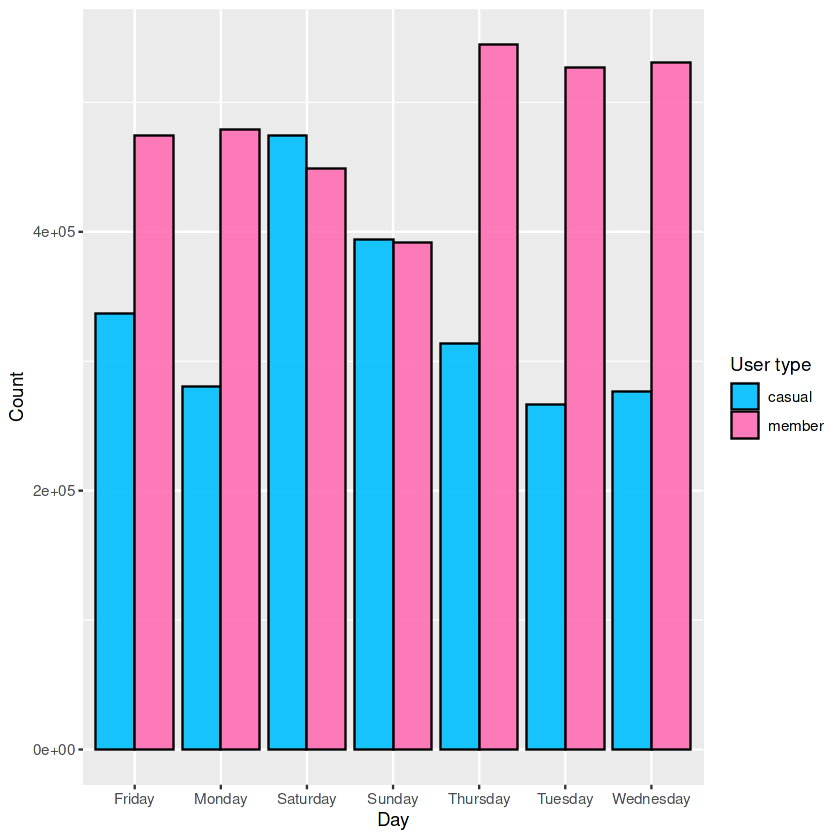

In [43]:
ggplot(clean_data) + geom_bar(position="dodge", aes(x=day_of_week, fill=member_casual), alpha =0.9, color="black") + xlab("Day") + ylab("Count") +labs(fill="User type")+ scale_fill_manual(values=c("deepskyblue1","hotpink1"))

We can see there is no huge difference between user types respect to the day of the week they used the bicycles, just the number of them. **There are more anual members than casual members.**

Another interest thing to look at will be the type of bike that use each type of user.

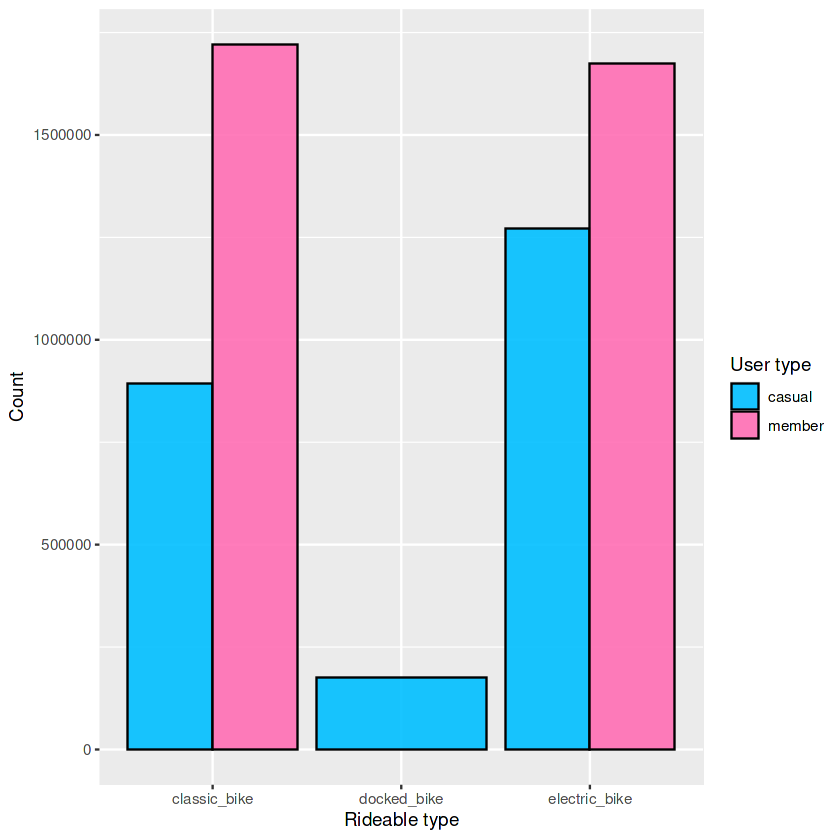

In [44]:
ggplot(clean_data) + geom_bar(position = "dodge", aes(x=rideable_type, fill=member_casual),alpha=0.9, color="black") + xlab("Rideable type") + ylab("Count") +labs(fill="User type")+ scale_fill_manual(values=c("deepskyblue1","hotpink1"))

Here we can note differences. The most obvious is that **there is no anual members that use docked bikes. Besides, the casual users rather by a little bit more electric bikes.**

Now, it's time to implement the quantities computed before. Like distance and time of ride. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


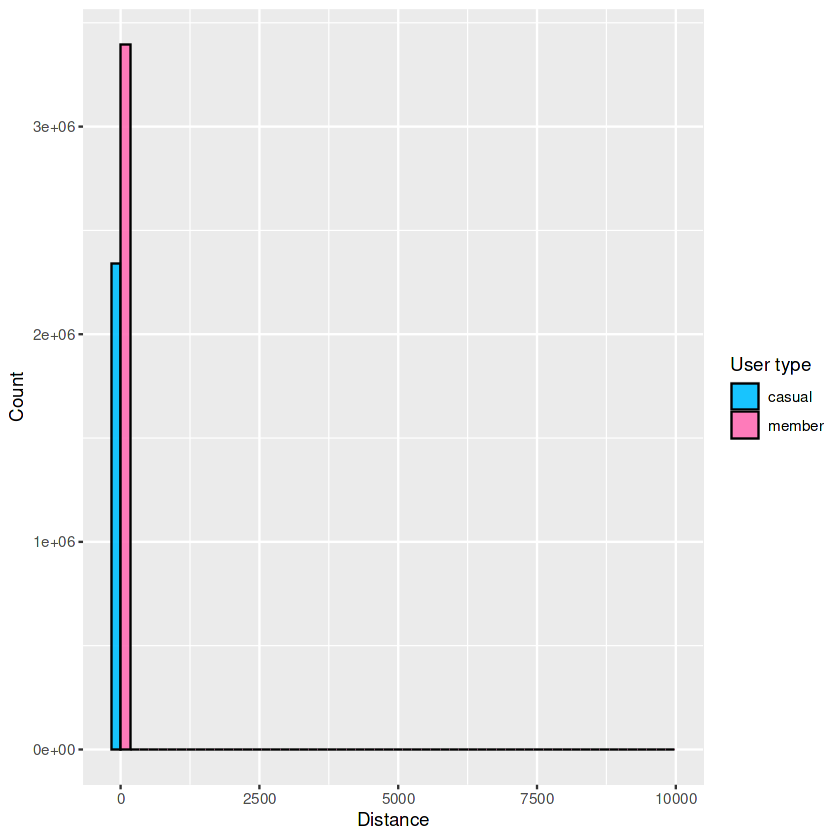

In [45]:
ggplot(clean_data, aes(x=distance, fill=member_casual)) + geom_histogram(position="dodge",alpha=0.9) + xlab("Distance") + ylab("Count") +labs(fill="User type")+ scale_fill_manual(values=c("deepskyblue1","hotpink1"))

We can see almost the whole data in concentrated around the average value, so lets filter some of the data to improve the viz.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


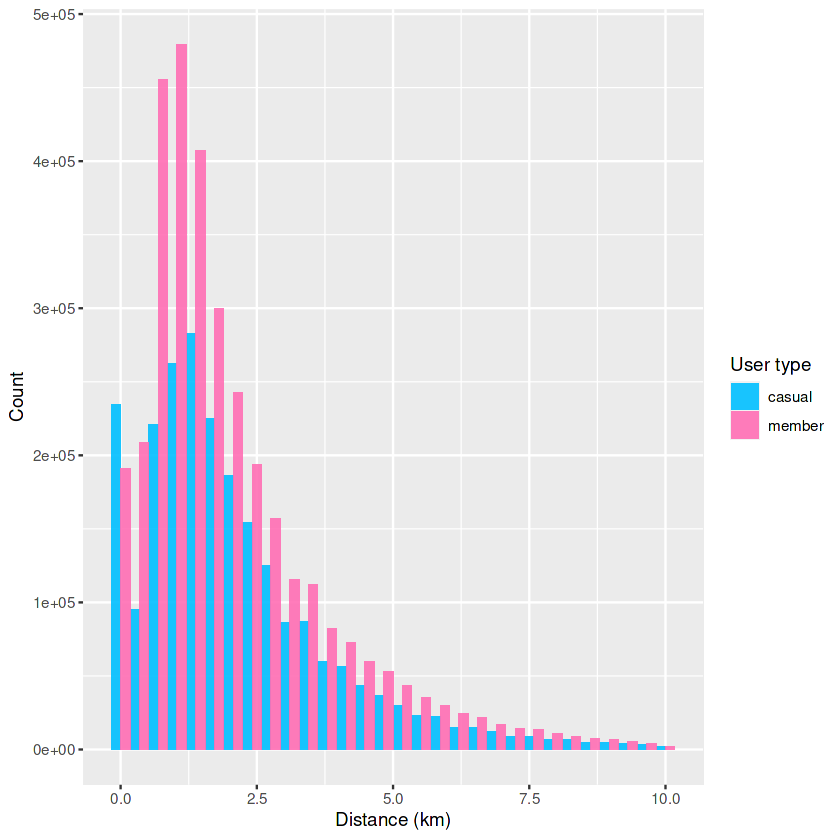

In [47]:
clean_data_dis_filter <- clean_data[clean_data$distance < 10,]
ggplot(clean_data_dis_filter, aes(x=distance, fill=member_casual)) + geom_histogram(position="dodge",alpha=0.9) + xlab("Distance (km)") + ylab("Count") +labs(fill="User type")+ scale_fill_manual(values=c("deepskyblue1","hotpink1"))

Notice the beaviour among casual and members is similar, except **a little pick at 0 for the casual users.**



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


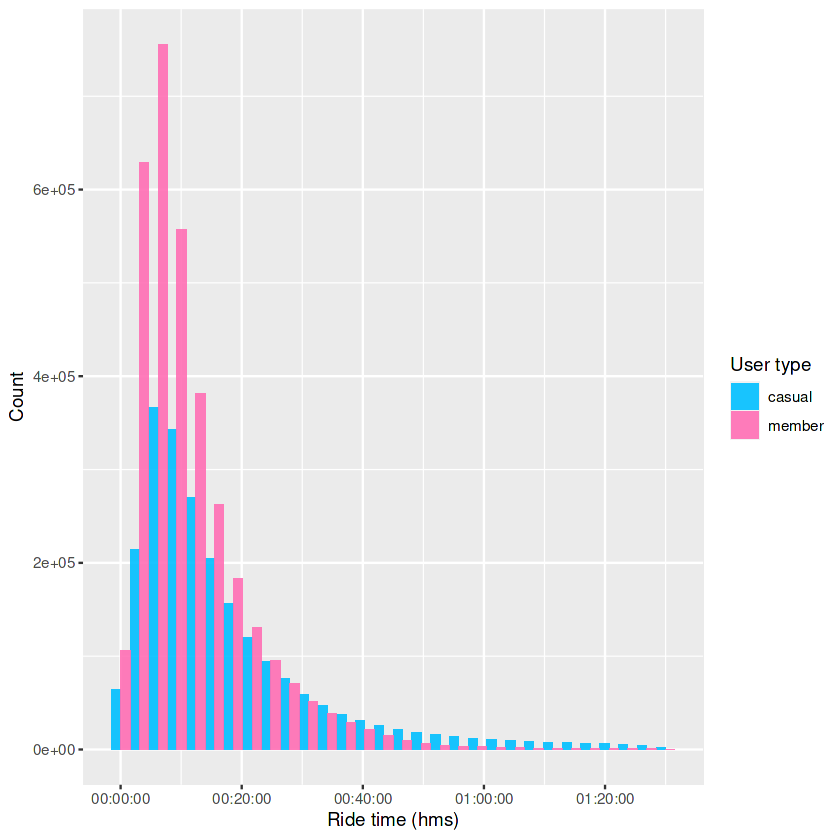

In [48]:
clean_data_time_filter <- clean_data_dis_filter[clean_data_dis_filter$ride_time < as_hms("01:30:00"),]
ggplot(clean_data_time_filter, aes(x=ride_time, fill=member_casual)) + geom_histogram(position="dodge",alpha=0.9) + xlab("Ride time (hms)") + ylab("Count") +labs(fill="User type")+ scale_fill_manual(values=c("deepskyblue1","hotpink1"))

In [49]:
random_sample <- sample_n(clean_data_time_filter,5000) #Taking a sample 

`geom_smooth()` using formula = 'y ~ x'


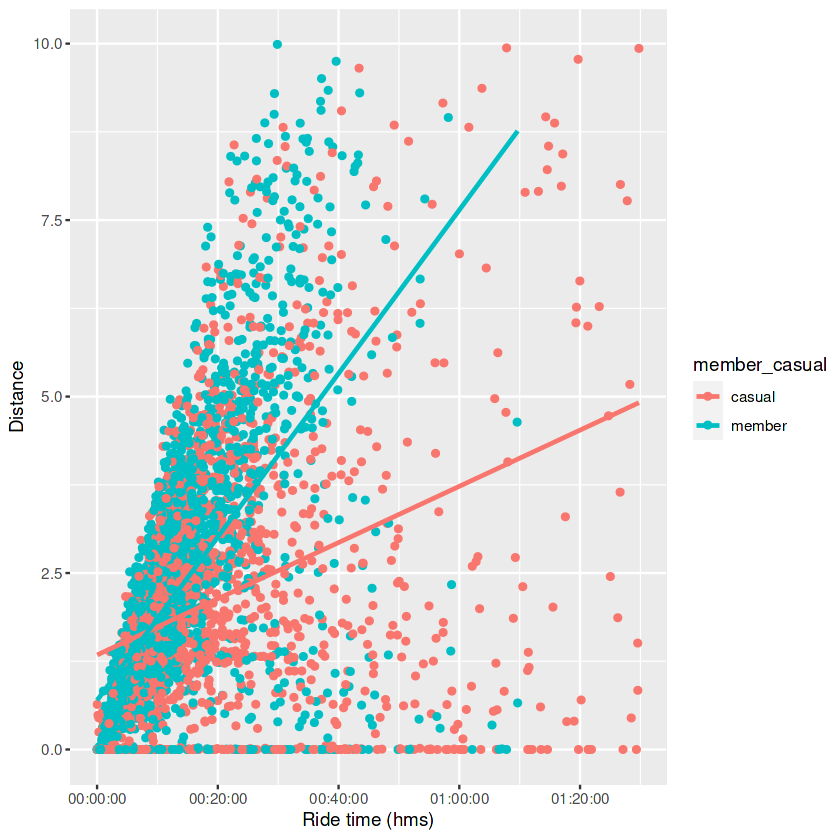

In [50]:
ggplot(random_sample, aes(x=ride_time, y= distance,color=member_casual)) + geom_point() + xlab("Ride time (hms)") + ylab("Distance") +labs(fill="User type")+geom_smooth(method=lm,se=FALSE)+ scale_fill_manual(values=c("deepskyblue1","hotpink1"))

This denotes the relation between ride time and distance traveled. The line slope tell us about the velocity of the users, which also we can calculate their respective average values.

In [19]:
clean_data_time_filter %>%
    group_by(member_casual) %>%
    summarize(number_users=n(), 
              mean_time=seconds_to_period(mean(ride_time)), 
              mean_distance=mean(distance),
              average_velocity_kmh = mean(distance)/mean(as.numeric(ride_time)/3600)
             )

member_casual,number_users,mean_time,mean_distance,average_velocity_kmh
<chr>,<int>,<Period>,<dbl>,<dbl>
casual,2262303,17M 21.0879289821046S,2.088603,7.222225
member,3366823,11M 34.0632822099643S,2.032863,10.544151


We obtained what was expected, there is a relation between distance and time, hence this behaviour. **Casual users go slower than the members.** We can see there is no relatable difference between users also in this case, except their velocity. 

The last thing we could look at is a plot of distribution respect where the users pick the bike and where they leave it. **(Here it's not possible load the necessary packages)**. Instead, we can plot a scatterplot diagram to compare, despite we cannot draw the map with the points of the stations. 

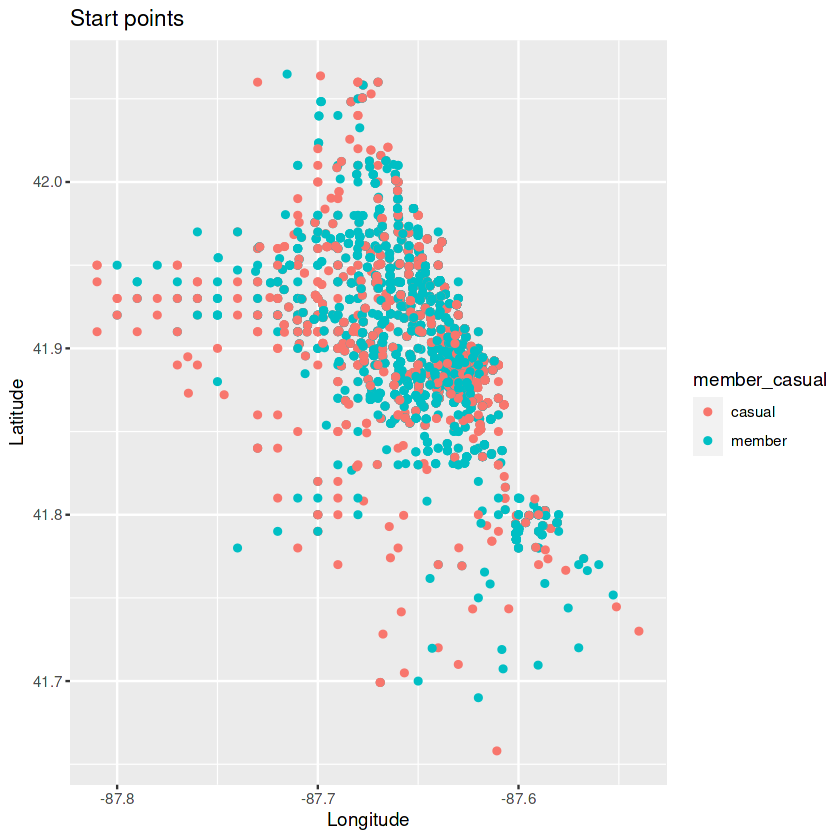

In [51]:
ggplot(random_sample, aes(x=start_lng, y= start_lat,color=member_casual)) + geom_point() + xlab("Longitude") + ylab("Latitude") +labs(title="Start points", fill="User type")+ scale_fill_manual(values=c("deepskyblue1","hotpink1"))

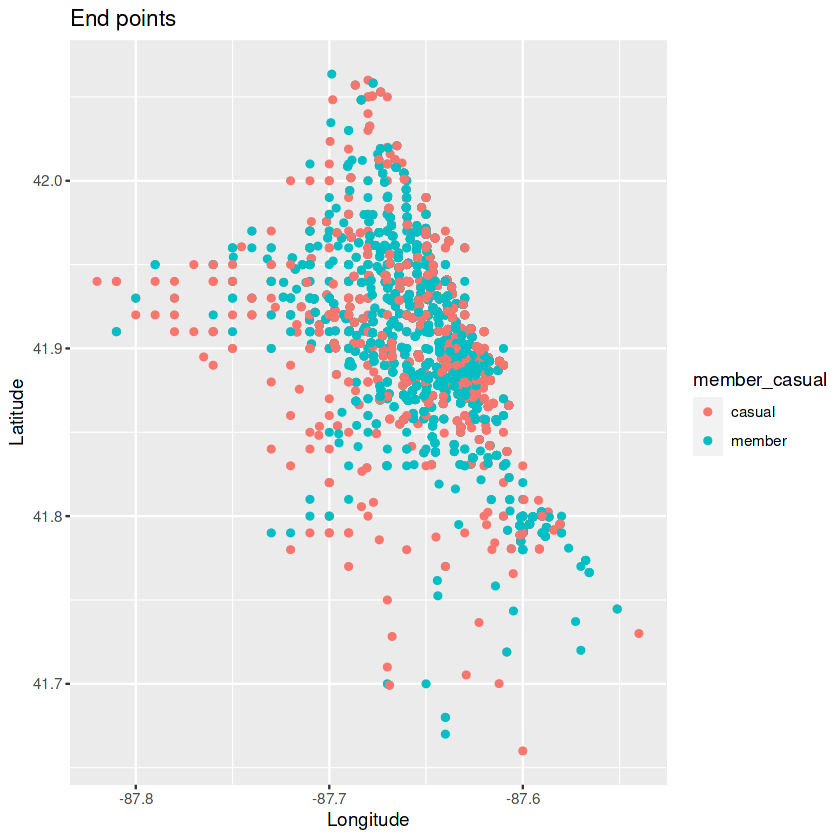

In [52]:
ggplot(random_sample, aes(x=end_lng, y= end_lat,color=member_casual)) + geom_point() + xlab("Longitude") + ylab("Latitude") +labs(title="End points", fill="User type")+ scale_fill_manual(values=c("deepskyblue1","hotpink1"))

We can observe there is no remarkable fact. All the points are well distributed respect to each kind of user. 

# Conclusions
* There are more anual members than casual members
* Anual members don't use docked bikes. Besides, the casual users rather by a little bit more electric bikes.
* Seems casual members traveled fewer distance respect to the members, or simply don't use the bicycle when they contract the service.
* Casual users go slower than members.

## Act
A recommendation that can be done is implement som marketing strategy to impulse the use of docker bikes on members with some improvement for them, such that casual think on contract the membership. It also may bw done for electric bicyles, due to seems casual users like it a little bit more. 